In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
dataset = pd.read_csv("waterdata.csv", encoding= 'unicode_escape')
print("Size of data", dataset.shape)
dataset.head(5)

Size of data (1991, 12)


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [3]:
# Remove locations, state and station code
dataset.drop('LOCATIONS', axis=1, inplace=True)
dataset.drop('STATION CODE', axis=1, inplace=True)
dataset.drop('STATE', axis=1, inplace=True)
# Remove all rows with NAN value
dataset = dataset.replace('NAN', np.NaN)
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)
data=dataset
print(data.shape)
data.head()

(1594, 9)


,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
1,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
2,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
3,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
4,30,5.5,7.4,81,1.5,0.1,2853,4049,2014


In [4]:
# Change type from string to float
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(data['FECAL COLIFORM (MPN/100ml)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

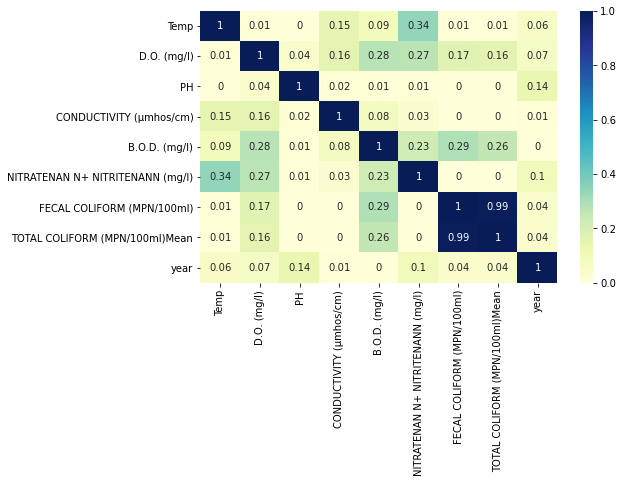

In [5]:
#Ploting heatmap to check correlation
data_corr = data.corr().abs().round(2)
plt.figure(figsize = (8,5))
sb.heatmap(data_corr,cmap='YlGnBu',annot=True)

In [6]:
# Remove fecal coliform as it has high corr with total coliform
data.drop('FECAL COLIFORM (MPN/100ml)', axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,year
0,29.8,5.7,7.2,189.0,2.0,0.2,8391.0,2014
1,29.5,6.3,6.9,179.0,1.7,0.1,5330.0,2014
2,29.7,5.8,6.9,64.0,3.8,0.5,8443.0,2014
3,29.5,5.8,7.3,83.0,1.9,0.4,5500.0,2014
4,30.0,5.5,7.4,81.0,1.5,0.1,4049.0,2014


In [7]:
# Remove data with very high values (beyond the scope of float to handle), infinite or -infinite
df=data
assert isinstance(df, pd.DataFrame)
df.dropna(inplace=True)
indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
df[indices_to_keep].astype(np.float64)
df.reset_index(drop=True, inplace=True)
df.shape

(1579, 8)

[]

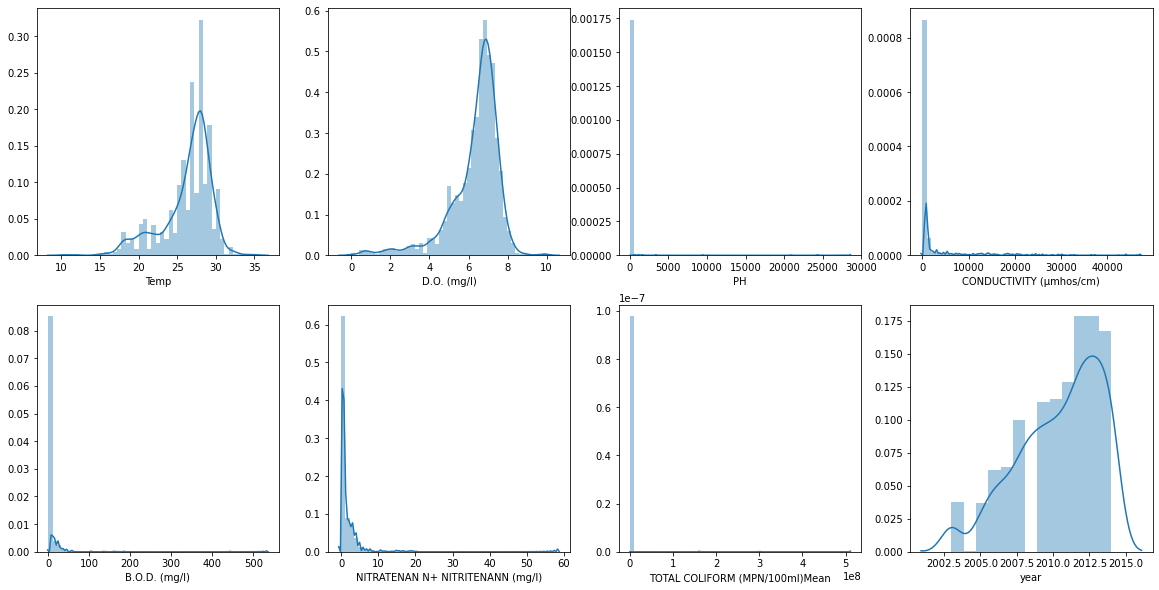

In [8]:
#Ploting distplot for all columns(for checking the distribution of data)
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.iloc[:,0:8].items():
    sb.distplot(v, ax=axs[index])  #Distplot combines the matplotlib hist() with the seaborn kdeplot() kernel density estimation
    index += 1
plt.plot()

In [9]:
# Remove outliers
#PH above 14
df_ph = df[ df['PH'] > 14 ]
df = df.drop(df_ph.index, axis=0)
#Conductivity above 1000
df_ph = df[ df['CONDUCTIVITY (µmhos/cm)'] > 1000 ]
df = df.drop(df_ph.index, axis=0)
#BOD above 50
df_ph = df[ df['B.O.D. (mg/l)'] > 50 ]
df = df.drop(df_ph.index, axis=0)

[]

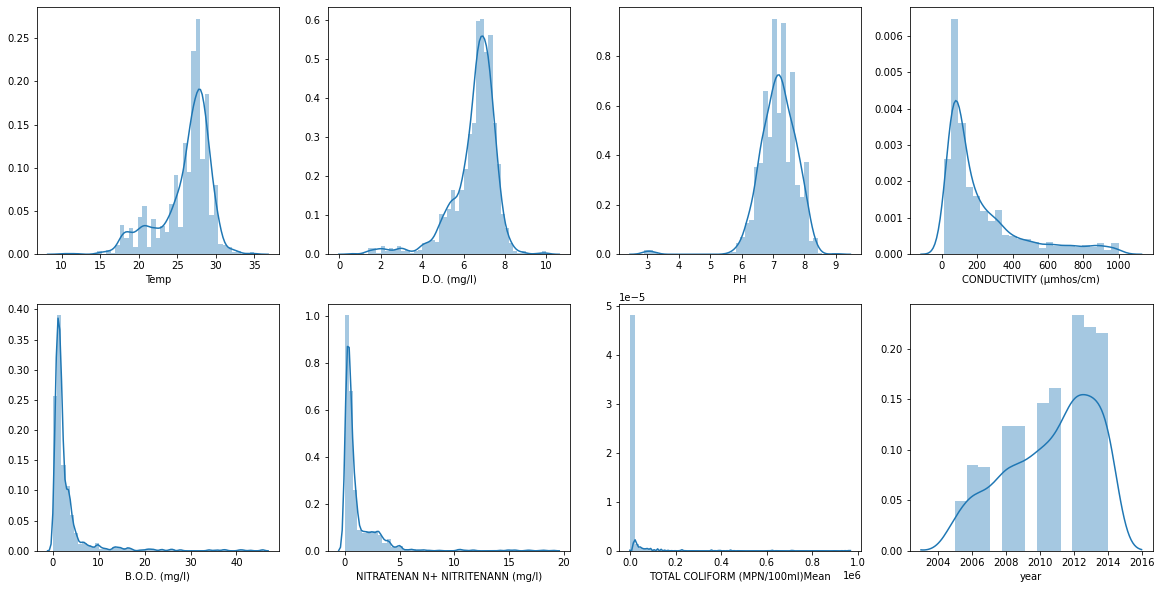

In [10]:
#Ploting distplot after removing
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.iloc[:,0:8].items():
    sb.distplot(v, ax=axs[index])  #Distplot combines the matplotlib hist() with the seaborn kdeplot() kernel density estimation
    index += 1
plt.plot()

In [11]:
df.shape

(1251, 8)

In [12]:
#initialization
start=0
end=1251
Temp= df.iloc[start:end ,0]
do = df.iloc[start:end ,1].astype(np.float64)
value=0
ph = df.iloc[ start:end,2]  
co = df.iloc[start:end ,3].astype(np.float64)   
bod = df.iloc[start:end ,4].astype(np.float64)
na = df.iloc[start:end ,5].astype(np.float64)
tc = df.iloc[start:end ,6].astype(np.float64)
year = df.iloc[start:end,7]

In [13]:
df=pd.concat([Temp,do,ph,co,bod,na,tc,year],axis=1)
df.columns = ['Temp','do','ph','co','bod','na','tc','year']

In [14]:
#calulation of Ph
df['npH']=df.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [15]:
#calculation of dissolved oxygen
df['ndo']=df.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [16]:
#calculation of total coliform
df['nco']=df.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [17]:
#calc of B.D.O
df['nbdo']=df.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [18]:
#calculation of electrical conductivity
df['nec']=df.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [19]:
#Calulation of nitrate
df['nna']=df.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

df.head()

,Temp,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbdo,nec,nna
0,29.8,5.7,7.2,189.0,2.0,0.2,8391.0,2014,100,80,40,100,60,100
1,29.5,6.3,6.9,179.0,1.7,0.1,5330.0,2014,80,100,40,100,60,100
2,29.7,5.8,6.9,64.0,3.8,0.5,8443.0,2014,80,80,40,80,100,100
3,29.5,5.8,7.3,83.0,1.9,0.4,5500.0,2014,100,80,40,100,80,100
4,30.0,5.5,7.4,81.0,1.5,0.1,4049.0,2014,100,80,40,100,80,100


In [20]:
df['wph']=df.npH * 0.165
df['wdo']=df.ndo * 0.281
df['wbdo']=df.nbdo * 0.234
df['wec']=df.nec* 0.009
df['wna']=df.nna * 0.028
df['wco']=df.nco * 0.281
df['wqi']=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco 
df.head()

,Temp,do,ph,co,bod,na,tc,year,npH,ndo,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,29.8,5.7,7.2,189.0,2.0,0.2,8391.0,2014,100,80,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
1,29.5,6.3,6.9,179.0,1.7,0.1,5330.0,2014,80,100,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
2,29.7,5.8,6.9,64.0,3.8,0.5,8443.0,2014,80,80,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
3,29.5,5.8,7.3,83.0,1.9,0.4,5500.0,2014,100,80,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
4,30.0,5.5,7.4,81.0,1.5,0.1,4049.0,2014,100,80,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


In [21]:
#Creating the matrix of Independent Variables(X) and the vector of Dependent Variable(y)
data=df[['do', 'ph', 'co', 'bod', 'na', 'tc', 'wqi']]
X = data.iloc[:,0:3].values
y = data.iloc[:, [6]].values

In [22]:
#Splitting the data into Training-set and Test-set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 3)
(251, 3)
(1000, 1)
(251, 1)


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)

In [24]:
#Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coef = regressor.coef_/scalerX.scale_*scalery.scale_[0]
intercept = regressor.intercept_-np.dot(coef,(scalerX.scale_*scalery.scale_[0]))
print('Bias b0:', np.round(intercept,2))
print('b1, b2, b3:', np.round(coef,3))

Bias b0: [-81.12]
b1, b2, b3: [[ 6.28   4.865 -0.012]]


In [25]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
#Reversing the feature scaling on y_pred and X_test
X_test = scalerX.inverse_transform(X_test)
y_pred = scalery.inverse_transform(y_pred)

In [26]:
from sklearn import metrics
print('Mean abs err:', metrics.mean_absolute_error(y_test,y_pred))
print('Root mean sq err:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 score:', metrics.r2_score(y_test,y_pred))       #Accuracy of model

Mean abs err: 5.587960444176175
Root mean sq err: 7.1025916609521875
R2 score: 0.6900700496818025


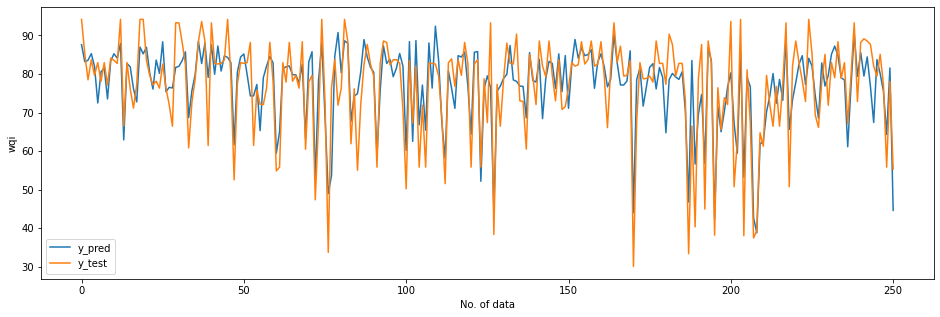

In [27]:
#Plot of the predicted and actual value of medv as a function of the independent variables
plt.figure(figsize = (16,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.xlabel('No. of data')
plt.ylabel("wqi")
plt.legend(['y_pred', 'y_test'], loc='lower left')
plt.show()

In [28]:
target=[]
for i in range (0,1251):
    if df.iloc[i,20]<20:
        target.append(1)
    elif df.iloc[i,20]<40:
        target.append(2)
    elif df.iloc[i,20]<60:
        target.append(3)
    elif df.iloc[i,20]<80:
        target.append(4)
    else:
        target.append(5)

target = np.array(target)
target = target[...,None]
Xf = np.c_[X, target]
dataset = pd.DataFrame(data =Xf, columns = ['do', 'ph', 'co', 'target'])
dataset.sample(5)

,do,ph,co,target
1221,7.400,6.070,142.8,4.0
277,6.800,7.200,105.0,5.0
1151,6.333,7.277,542.0,5.0
681,6.500,6.800,58.0,4.0
672,6.700,6.900,43.0,4.0


In [29]:
X = dataset.iloc[:,0:3].values
y = dataset[['target']].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X)
X = scalerX.transform(X)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
rf = RandomForestClassifier(max_depth=3, random_state=15)
rf.fit(X, y.ravel())
y_pred = rf.predict(X)
cm=confusion_matrix(y, y_pred)
print(cm)
print(classification_report(y, y_pred))

[[  0   3  17   0]
 [  0  38  39   0]
 [  0   6 407  89]
 [  0   1  80 571]]
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        20
         3.0       0.79      0.49      0.61        77
         4.0       0.75      0.81      0.78       502
         5.0       0.87      0.88      0.87       652

    accuracy                           0.81      1251
   macro avg       0.60      0.55      0.56      1251
weighted avg       0.80      0.81      0.80      1251

